<a href="https://colab.research.google.com/github/vanecornejo/EDP-II/blob/main/M%C3%A9todo%20expl%C3%ADcito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecuación de onda. Método explícito**

Tenemos el problema hiperbólico

$$ \frac{\partial^2 u}{\partial t^2}(x,t) - 4 \frac{\partial^2 u}{\partial x^2}(x,t) = 0 \quad 0<x<1, \quad 0<t $$

con condiciones de frontera: $$ u(0,t)=0 = u(1,t) = 0, \quad para \quad 0<t $$

y condiciones iniciales:
$$ u(x,0) = f(x) = \sin(\pi x),  \quad  0 \leq x \leq 1$$
$$ \frac{\partial u}{\partial t}(x,0)= g(x) = 0,  \quad  0 \leq x \leq 1 $$

Usando $h = 0.1$ y $k = 0.05$, vamos a comparar los resultados con la solución exacta:
$$ u(x,t) = sen(\pi x) cos(2 \pi t)$$

<br>

Como $c^2 = 4$, entonces $c = 2$.

En este caso, usamos el método explícito centrado visto en clase, con la ecuación en diferencias finitas de la ecuación de onda obtenida:

$$ u_{i, j+1} = 2(1-r^2)u_{i, j} - u_{i, j-1} + r^2(u_{i+1, j} + u_{i-1, j}) $$

con $i=1,...,N$  y $j=1,...,N_t-1$

donde:
$$ r = \frac{c\,k}{h} $$


### **Ejercicio 1:**
Generar las gráficas 2D y 3D de la solución hasta $t=0.50$

In [147]:
# Importamos librerías

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# Para mostrar gráficos dentro de nuestra notebook:
%matplotlib inline

In [148]:
# Parámetros:
h = 0.1  # paso de espacio
k = 0.05  # paso de tiempo
c = 2 # velocidad de la onda
r = c * k / h
print("r =", r)

r = 1.0


In [149]:
# Para construir la malla:
x = np.arange(0, 1 + h, h)
t = np.arange(0, 1 + k, k)

Nx = len(x)
Nt = len(t)

# Para guardar la matriz de la solución:
U = np.zeros((Nt, Nx))

# Ponemos la condición inicial u(x,0) = sin(pi x)
U[0,:] = np.sin(np.pi*x)

# Usando u_t(x,0)=0
for i in range(1, Nx-1):
    U[1,i] = U[0,i] + 0.5 * r**2 * (U[0,i+1] - 2*U[0,i] + U[0,i-1])

# Condiciones de frontera
U[:,0] = 0
U[:,-1] = 0

# Iteración con la ecuación de onda en diferencias finitas:
for n in range(1, Nt-1):
    for i in range(1, Nx-1):
        U[n+1,i] = (2*(1-r**2)*U[n,i]
                    - U[n-1,i]
                    + r**2*(U[n,i+1] + U[n,i-1]))

Vamos a imprimir la gráfica en 2D de la solución numérica para $t = 0, 0.1, 0.2, 0.3, 0.4, 0.5$

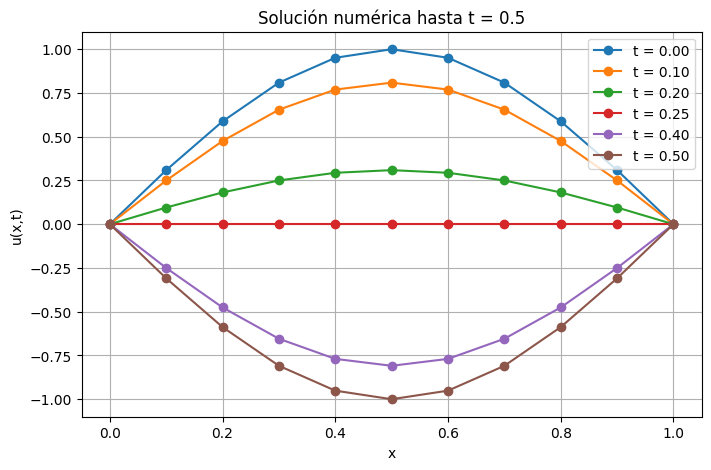

In [150]:
fig, ax = plt.subplots(figsize=(8,5))

tiempos = [0, int(0.1/k), int(0.2/k), int(0.3/k), int(0.4/k), int(0.5/k)]
for idx in tiempos:
    ax.plot(x, U[idx,:], '-o', label=f"t = {t[idx]:.2f}")

ax.set_title("Solución numérica hasta t = 0.5")
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.grid(True)
ax.legend()
plt.show()

La gráfica en 3D hasta $t=0.50$:

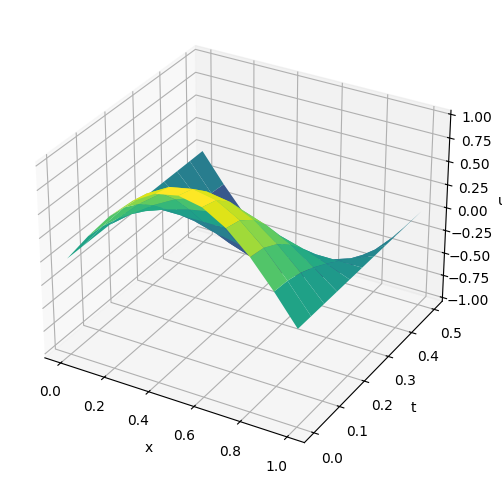

In [151]:
limit = int(0.5/k)

X, T = np.meshgrid(x, t[:limit+1])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U[:limit+1,:], cmap='viridis')

ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
plt.show()

### **Ejercicio 2:**
Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6. Graficar y calcular el error.

Vamos a poner los datos de la tabla 12.6 para comparar los resultados obtenidos con esta tabla.

In [152]:
# Hacemos una tabla con los valores obtenidos de la solución numérica
tabla_x = np.arange(0, 1+h, h)

# Hacemos una tabla con los valores de la tabla 12.6
tabla_vals = np.array([
    0.0000000000, 0.3090169944, 0.5877852523, 0.8090169944, 0.9510565163, 1.0000000000,
    0.9510565163, 0.8090169944, 0.5877852523, 0.3090169944,0.0000000000
])

# La solución numérica en t=1 (n=20 si k=0.05)
n20 = int(1/k)
u_num = U[n20,:]

# Hacemos e imprimimos la tabla comparativa
print("Comparación de la solución numérica obtenida y los datos de la tabla 12.6:\n")
print("  x   |  Tabla 12.6  |   Numérico   | Diferencia \n")
for i in range(len(tabla_x)):
    diff = u_num[i] - tabla_vals[i]
    print(f"{tabla_x[i]:.1f}   | {tabla_vals[i]:.10f} | {u_num[i]:.10f} | {diff:.3e}")

Comparación de la solución numérica obtenida y los datos de la tabla 12.6:

  x   |  Tabla 12.6  |   Numérico   | Diferencia 

0.0   | 0.0000000000 | 0.0000000000 | 0.000e+00
0.1   | 0.3090169944 | 0.3090169944 | -2.505e-11
0.2   | 0.5877852523 | 0.5877852523 | -7.527e-12
0.3   | 0.8090169944 | 0.8090169944 | -2.505e-11
0.4   | 0.9510565163 | 0.9510565163 | -4.847e-12
0.5   | 1.0000000000 | 1.0000000000 | 0.000e+00
0.6   | 0.9510565163 | 0.9510565163 | -4.847e-12
0.7   | 0.8090169944 | 0.8090169944 | -2.505e-11
0.8   | 0.5877852523 | 0.5877852523 | -7.527e-12
0.9   | 0.3090169944 | 0.3090169944 | -2.505e-11
1.0   | 0.0000000000 | 0.0000000000 | 0.000e+00


Vamos a calcular el error máximo y el error L2 para después graficar

In [153]:
error_max = np.max(np.abs(u_num - tabla_vals))
error_L2 = np.sqrt(np.sum((u_num - tabla_vals)**2))

print("\nError máximo =", error_max)
print("Error L2 =", error_L2)


Error máximo = 2.5052571128725276e-11
Error L2 = 5.167984247370056e-11


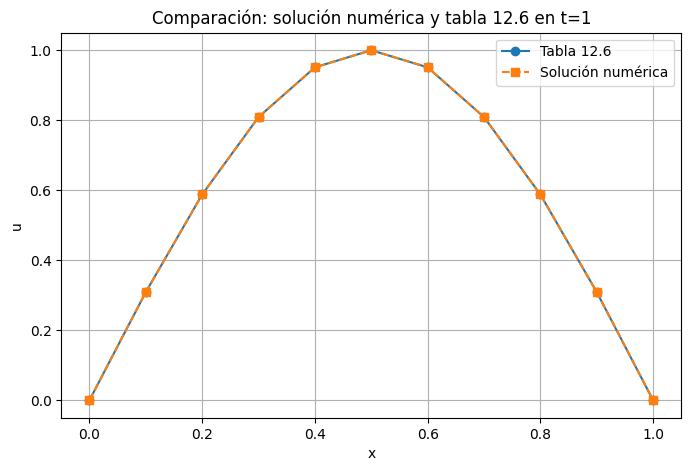

In [154]:
plt.figure(figsize=(8,5))
plt.plot(tabla_x, tabla_vals, "o-", label="Tabla 12.6")
plt.plot(x, u_num, "s--", label="Solución numérica")
plt.title("Comparación: solución numérica y tabla 12.6 en t=1")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.legend()
plt.show()

### **Ejercicio 3:**
Comparar esos mismos valores contra la solución exacta de la ecuación. Graficar y calcular el error. Discutir la comparación.


Ahora, tenemos que la solución exacta es:
$$ u(x,t) = \sin(\pi x)\cos(2\pi t) $$

Vamos a calcular los errores para compararlos

In [155]:
# Solución exacta:
u_exacto = np.sin(np.pi * x) * np.cos(2*np.pi*1)

print("\nSolución numérica vs Solución exacta:\n")
print("  x   |    Exacta    |   Numérica   | Diferencia \n")
for i in range(len(x)):
    error = u_num[i] - u_exacto[i]
    print(f"{x[i]:.1f}   | {u_exacto[i]:.10f} | {u_num[i]:.10f} | {error:.3e}")

error_max_exact = np.max(np.abs(u_num - u_exacto))
error_L2_exact  = np.sqrt(np.sum((u_num - u_exacto)**2))

print("\nError máximo vs exacto =", error_max_exact)
print("Error L2 vs exacto =", error_L2_exact)


Solución numérica vs Solución exacta:

  x   |    Exacta    |   Numérica   | Diferencia 

0.0   | 0.0000000000 | 0.0000000000 | 0.000e+00
0.1   | 0.3090169944 | 0.3090169944 | 5.551e-17
0.2   | 0.5877852523 | 0.5877852523 | 2.220e-16
0.3   | 0.8090169944 | 0.8090169944 | 0.000e+00
0.4   | 0.9510565163 | 0.9510565163 | -2.220e-16
0.5   | 1.0000000000 | 1.0000000000 | 0.000e+00
0.6   | 0.9510565163 | 0.9510565163 | -2.220e-16
0.7   | 0.8090169944 | 0.8090169944 | 0.000e+00
0.8   | 0.5877852523 | 0.5877852523 | -2.220e-16
0.9   | 0.3090169944 | 0.3090169944 | -5.551e-17
1.0   | 0.0000000000 | 0.0000000000 | -1.225e-16

Error máximo vs exacto = 2.220446049250313e-16
Error L2 vs exacto = 4.673069654455309e-16


Visualizamos la gráfica de la comparación:

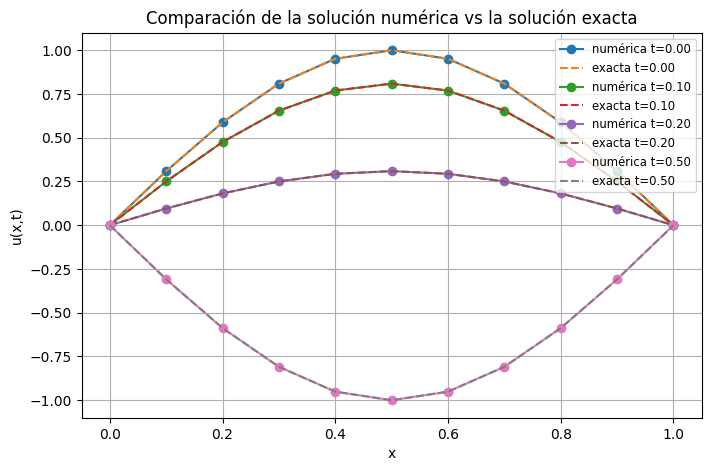

In [156]:
def comparacion_exacto(x_val, t_val):
    return np.sin(np.pi * x_val) * np.cos(2 * np.pi * t_val)

comparacion_t = [0.0, 0.1, 0.2, 0.5]
comparacion_indices = [int(round(tt / k)) for tt in comparacion_t]

plt.figure(figsize=(8,5))
for idx in comparacion_indices:
    plt.plot(x, U[idx, :], '-o', label=f"numérica t={t[idx]:.2f}")
    plt.plot(x, comparacion_exacto(x, t[idx]), linestyle='--', label=f"exacta t={t[idx]:.2f}")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Comparación de la solución numérica vs la solución exacta")
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

### **Ejercicio 4:**
Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.

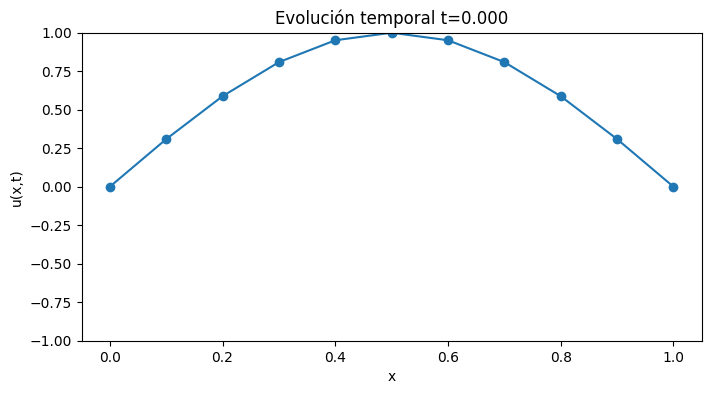

In [157]:
fig, ax = plt.subplots(figsize=(8,4))
line, = ax.plot(x, U[0,:], '-o')
ax.set_ylim(-1, 1)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Evolución temporal de la onda")

def animate(n):
    line.set_ydata(U[n,:])
    ax.set_title(f"Evolución temporal t={t[n]:.3f}")
    return line,

ani = animation.FuncAnimation(fig, animate, frames=Nt, interval=40)

HTML(ani.to_jshtml())